In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

In [56]:
data = fetch_california_housing()

In [57]:
X = data.data
y = data.target

In [58]:
X.shape

(20640, 8)

In [59]:
df = pd.DataFrame(X, columns=data.feature_names)
df['Value'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


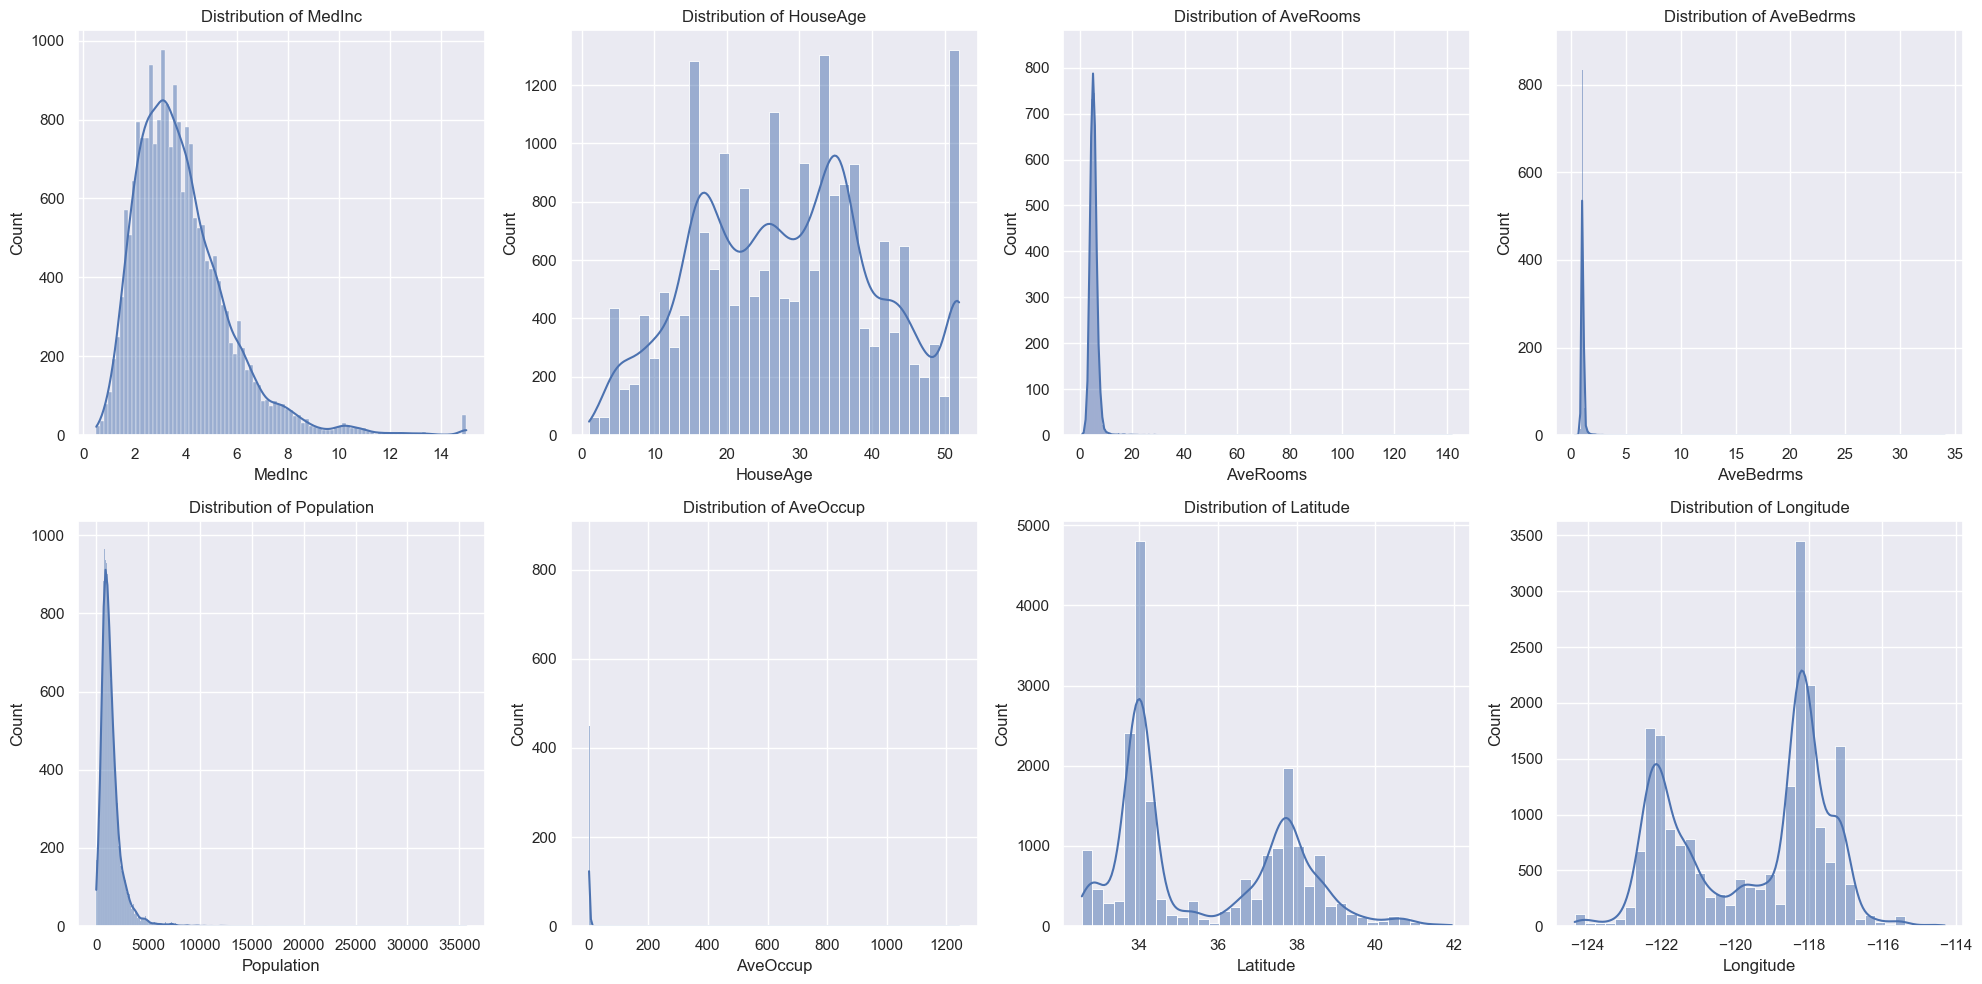

In [61]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten() 

for i in range(8):  
    sns.histplot(df.iloc[:, i], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {df.columns[i]}')

plt.tight_layout()
plt.show()

In [62]:
X = normalize(X)

In [63]:
def split_fit(df):

    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, shuffle=True)
    
    model = Sequential(name='House_Regressor')

    model.add(layers.Input((X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

    plt.plot(history.history['loss'][2:])
    plt.plot(history.history['val_loss'][2:])
    plt.legend(['loss','val_loss'])

    return model


Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 21995.2969 - mae: 70.7233 - val_loss: 18.8523 - val_mae: 3.3784
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1059.7772 - mae: 16.0478 - val_loss: 4.3406 - val_mae: 1.6800
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 144.0503 - mae: 5.4203 - val_loss: 2.4172 - val_mae: 1.1262
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 37.4883 - mae: 2.7544 - val_loss: 2.9878 - val_mae: 1.3033
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 33.3229 - mae: 2.2808 - val_loss: 2.3752 - val_mae: 1.1176
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.6833 - mae: 1.7922 - val_loss: 2.4786 - val_mae: 1.1459
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.7133 - mae: 1.5606 - val_loss: 2.3106 - val_mae: 1.0975
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4222 - mae: 1.4513 - val_loss: 2.5121 - val_mae: 1.1531
Epoch 9/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 

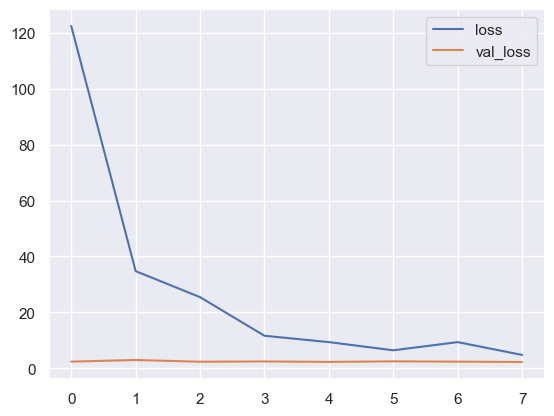

In [64]:
my_model = split_fit(df)

In [65]:
# Gauge feature importances based on weights of the first fully connected layer 

weights = my_model.layers[0].get_weights()[0]
feat_imps = np.sum(np.abs(weights), axis=1)
feat_imps = feat_imps / np.sum(feat_imps) # normalizing


featlist = list(zip(data.feature_names, feat_imps))

feat_sorted = sorted(featlist, key=lambda x: x[1], reverse=True)

feat_sorted

[('Latitude', 0.14929102),
 ('Longitude', 0.13364759),
 ('MedInc', 0.13360767),
 ('AveBedrms', 0.13026556),
 ('AveOccup', 0.12511517),
 ('HouseAge', 0.117813446),
 ('Population', 0.10818656),
 ('AveRooms', 0.10207302)]

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12335.2031 - mae: 59.6666 - val_loss: 5.1447 - val_mae: 1.3979
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 156.7660 - mae: 6.6465 - val_loss: 3.8140 - val_mae: 1.5592
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.4725 - mae: 2.3066 - val_loss: 3.2119 - val_mae: 1.3920
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.8163 - mae: 1.5090 - val_loss: 3.8838 - val_mae: 1.6019
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7383 - mae: 1.4218 - val_loss: 1.9600 - val_mae: 1.0036
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7098 - mae: 1.3097 - val_loss: 2.3396 - val_mae: 1.1222
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.4297 - mae: 1.2264 - val_loss: 1.5857 - val_mae: 0.9189
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8197 - mae: 1.1575 - val_loss: 1.7911 - val_mae: 0.9611
Epoch 9/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

<Sequential name=House_Regressor, built=True>

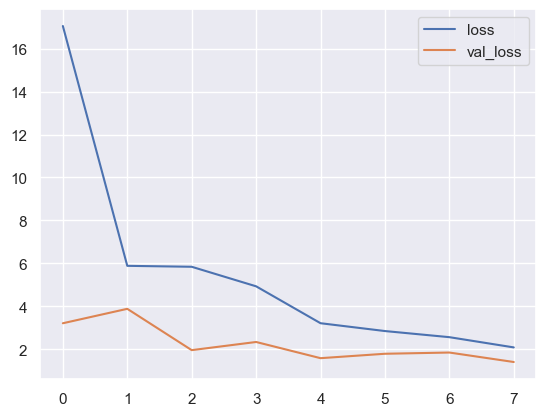

In [66]:
df2 = df.drop(feat_sorted[-1][0], axis=1)

split_fit(df)